In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import pickle
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stations = pd.read_csv('/content/drive/MyDrive/Capstone_Project/Datasets/archive/stations.csv', encoding = 'latin-1')
city_day = pd.read_csv('/content/drive/MyDrive/Capstone_Project/Datasets/archive/city_day.csv', encoding = 'latin-1')

In [ ]:
# Merge city_state_data with emissions_data using the 'City' column as the key
merged_data = pd.merge(stations, city_day, on='City', how='inner')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186670 entries, 0 to 186669
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿StationId  186670 non-null  object 
 1   StationName   186670 non-null  object 
 2   City          186670 non-null  object 
 3   State         186670 non-null  object 
 4   Status        186346 non-null  object 
 5   Date          186670 non-null  object 
 6   PM2.5         165862 non-null  float64
 7   PM10          131747 non-null  float64
 8   NO            169790 non-null  float64
 9   N2O           169699 non-null  float64
 10  NOx           173902 non-null  float64
 11  NH3           139296 non-null  float64
 12  CO            182963 non-null  float64
 13  SO2           165241 non-null  float64
 14  O3            164852 non-null  float64
 15  Benzene       171529 non-null  float64
 16  Toluene       163058 non-null  float64
 17  Xylene        86539 non-null   float64
 18  AQI 

In [ ]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.fillna(0, inplace=True)
merged_data.dropna(inplace=True)
merged_data['PM2.5'] = merged_data['PM2.5'].astype(int)
merged_data['PM10'] = merged_data['PM10'].astype(int)
merged_data['NO'] = merged_data['NO'].astype(int)
merged_data['N2O'] = merged_data['N2O'].astype(int)
merged_data['NOx'] = merged_data['NOx'].astype(int)
merged_data['NH3'] = merged_data['NH3'].astype(int)
merged_data['CO'] = merged_data['CO'].astype(int)
merged_data['SO2'] = merged_data['SO2'].astype(int)
merged_data['O3'] = merged_data['O3'].astype(int)
merged_data['Benzene'] = merged_data['Benzene'].astype(int)
merged_data['Toluene'] = merged_data['Toluene'].astype(int)
merged_data['Xylene'] = merged_data['Xylene'].astype(int)
merged_data['AQI'] = merged_data['AQI'].astype(int)
merged_data['AQI_Bucket'] = merged_data['AQI_Bucket'].astype('category')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186670 entries, 0 to 186669
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ï»¿StationId  186670 non-null  object        
 1   StationName   186670 non-null  object        
 2   City          186670 non-null  object        
 3   State         186670 non-null  object        
 4   Status        186670 non-null  object        
 5   Date          186670 non-null  datetime64[ns]
 6   PM2.5         186670 non-null  int64         
 7   PM10          186670 non-null  int64         
 8   NO            186670 non-null  int64         
 9   N2O           186670 non-null  int64         
 10  NOx           186670 non-null  int64         
 11  NH3           186670 non-null  int64         
 12  CO            186670 non-null  int64         
 13  SO2           186670 non-null  int64         
 14  O3            186670 non-null  int64         
 15  Benzene       186

In [ ]:
india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-8-3f3222138d03>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
# Assuming the emissions data has columns like 'NO', 'CO', etc.
emissions_by_state = merged_data.groupby('State')[['PM2.5',	'PM10',	'NO',	'N2O',	'NOx',	'NH3',	'CO',	'SO2',	'O3',	'Benzene',	'Toluene',	'Xylene',	'AQI',	'AQI_Bucket']].sum().reset_index()

<ipython-input-9-71a14ea36214>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emissions_by_state = merged_data.groupby('State')[['PM2.5',	'PM10',	'NO',	'N2O',	'NOx',	'NH3',	'CO',	'SO2',	'O3',	'Benzene',	'Toluene',	'Xylene',	'AQI',	'AQI_Bucket']].sum().reset_index()


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


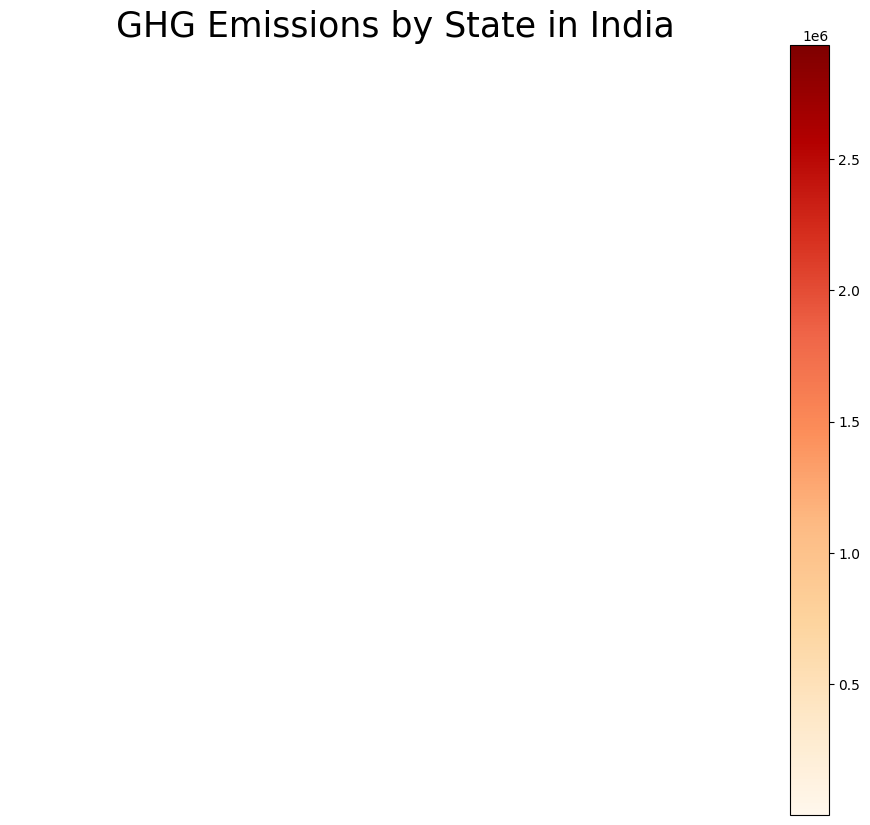

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.axis('off')
ax.set_title('GHG Emissions by State in India', fontdict={'fontsize': '25', 'fontweight': '3'})

# Plot the emissions using a colormap
india.merge(emissions_by_state, left_on='name', right_on='State').plot(column='NO', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')

# Add a colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=emissions_by_state['NO'].min(), vmax=emissions_by_state['NO'].max()))
sm._A = []
fig.colorbar(sm, cax=cax)

# Show the plot
plt.show()

In [ ]:
print(merged_data)

       ï»¿StationId                     StationName       City  \
0             AP001  Secretariat, Amaravati - APPCB  Amaravati   
1             AP001  Secretariat, Amaravati - APPCB  Amaravati   
2             AP001  Secretariat, Amaravati - APPCB  Amaravati   
3             AP001  Secretariat, Amaravati - APPCB  Amaravati   
4             AP001  Secretariat, Amaravati - APPCB  Amaravati   
...             ...                             ...        ...   
186665        WB013       Victoria, Kolkata - WBPCB    Kolkata   
186666        WB013       Victoria, Kolkata - WBPCB    Kolkata   
186667        WB013       Victoria, Kolkata - WBPCB    Kolkata   
186668        WB013       Victoria, Kolkata - WBPCB    Kolkata   
186669        WB013       Victoria, Kolkata - WBPCB    Kolkata   

                 State  Status       Date  PM2.5  PM10  NO  N2O  NOx  NH3  CO  \
0       Andhra Pradesh  Active 2017-11-24     71   115   1   20   12   12   0   
1       Andhra Pradesh  Active 2017-11-25    

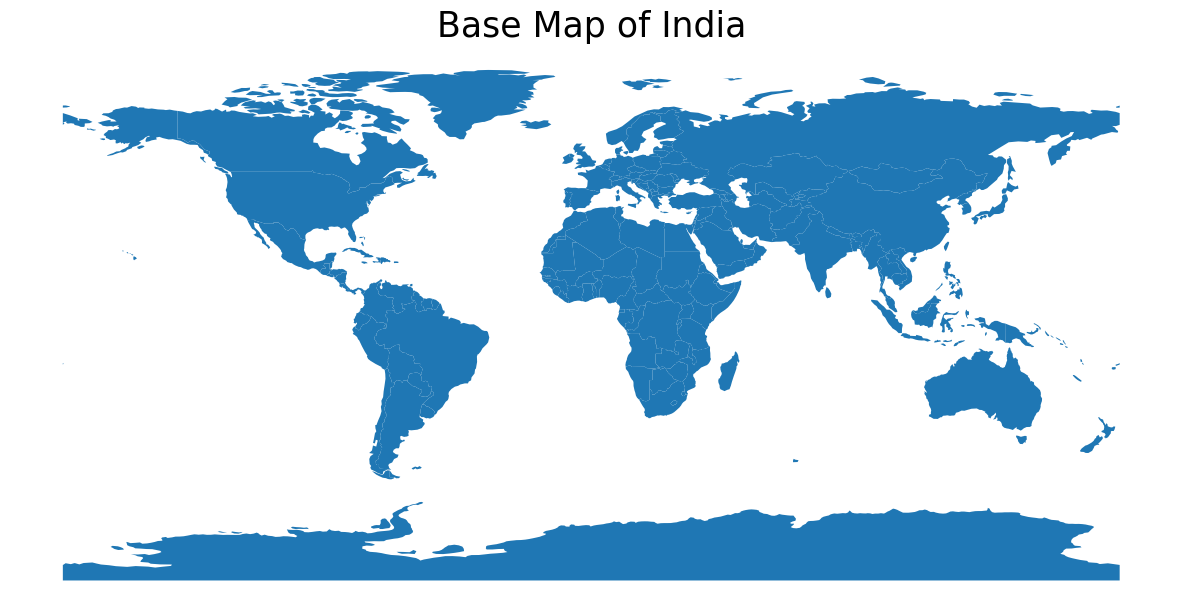

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.axis('off')
ax.set_title('Base Map of India', fontdict={'fontsize': '25', 'fontweight': '3'})
india.plot(ax=ax)
plt.show()

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming 'longitude' and 'latitude' are the columns with coordinates
geometry = [Point(xy) for xy in zip(emissions_by_state['NO'], emissions_by_state['NO'])]

# Create a GeoDataFrame with the specified geometry
emissions_by_state = gpd.GeoDataFrame(emissions_by_state, geometry=geometry)

# Now you can set the CRS
emissions_by_state.crs = 'EPSG:4326'

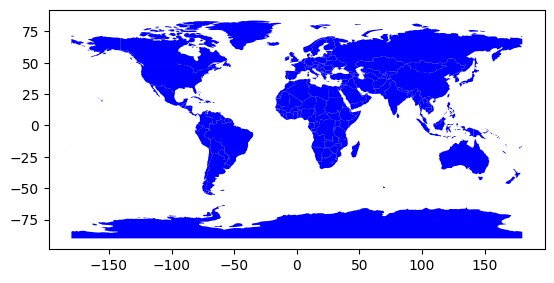

In [ ]:
india.plot(color='blue')
plt.show()

<ipython-input-15-1704709e59f4>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


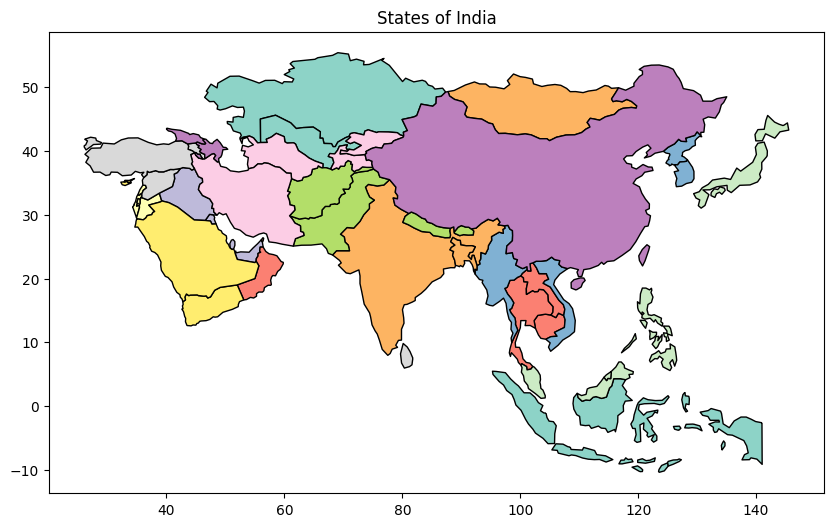

In [ ]:
import geopandas as gpd

# Load a GeoDataFrame with the geometries of Indian states from the built-in dataset
india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india = india[india['continent'] == 'Asia']  # Filter for Asian countries

# Plot the Indian states
india.plot(figsize=(10, 10), edgecolor='k', cmap='Set3')
plt.title('States of India')
plt.show()